## Reliability Statistics Notebook

This Jupyter notebook shows how to compute reliability engineering 
statistics (reliability, confidence, and assurance) using the
[relistats library](https://github.com/sanjaymjoshi/relistats).

This notebook was used to generate the plots and tables in the paper:
- S.M. Joshi, "Computation of Reliability Statistics for Success-Failure Experiments," [arXiv:2303.03167](https://doi.org/10.48550/arXiv.2303.03167), March 2023.

This is an interactive notebook. You can read the contents and also tweak some of the variables to generate your own plots and tables. Run the following code block first using the icon near the top-left.

  

In [1]:
# For online mode, such as google colab or GitHub code space
# You can use `pipenv install` for local use and not execute this cell
%pip install relistats
%pip install tabulate



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Section 2.1: Reliability

### Accuracy of Reliability Approximation

This section was created to assess the quality of reliability approximations using three methods:
- Wilson Score Interval
- Wilson Score Interval with Continuity Correction
- Numerical optimization
See the paper referenced above for details.

The numerical optimization is accurate and fast technique to calculate reliability or assurance.

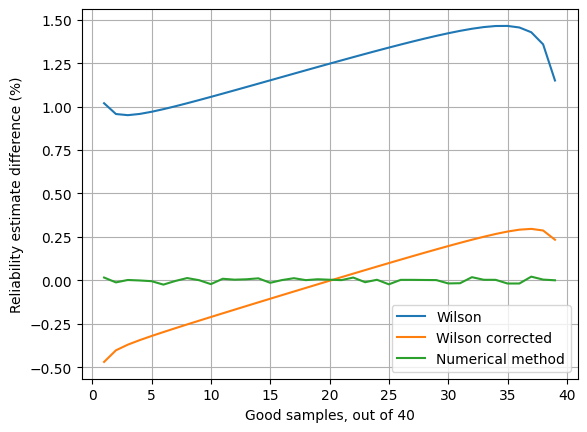

In [24]:
#@title Accuracy of Closed Form Reliability Computations { vertical-output: true }
n = 40 #@param {type:"integer"}
import matplotlib.pyplot as plt
from relistats.binomial import _wilson_lower, _wilson_lower_corrected, reliability_optim


r_mat = []
all_ns = range(1,n)
for ns in all_ns:
  r = ns/n
  c = confidence(n, n-ns, r)
  rw = _wilson_lower(r, n, c)
  rwc = _wilson_lower_corrected(r, n, c)
  r_optim = reliability_optim(n, n-ns, c)

  r_mat.append([(rw-r)*100, (rwc-r)*100, (r_optim-r)*100 ])

plt.plot(all_ns, r_mat)
  
plt.legend(['Wilson', 'Wilson corrected', 'Numerical method'])
plt.xlabel(f'Good samples, out of {n}')
plt.ylabel('Reliability estimate difference (%)')
#plt.title('Accuracy of Wilson Score Interval Methods')
plt.grid()
plt.show()


### Reliability

In the block below, the number of samples vary from 10 to 100 in steps of 10 and the number
of failures vary from 0 to 5. The confidence is held constant at 95%. If you are using this
notebook on Google Colab, you can change these numbers on the right and see how the plot
and table changes.

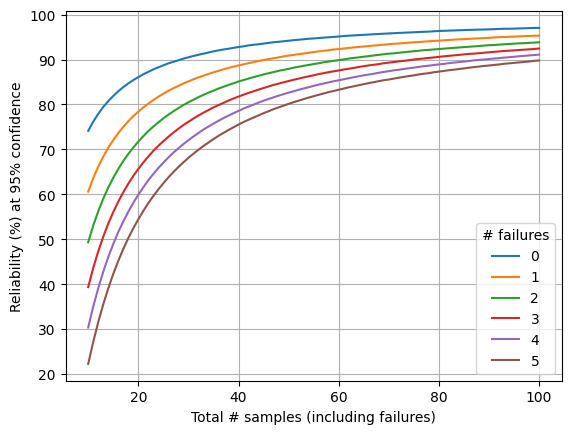

      10    20    30    40    50    60    70    80    90    100
--  ----  ----  ----  ----  ----  ----  ----  ----  ----  -----
 0  74.1  86.1  90.5  92.8  94.2  95.1  95.8  96.3  96.7   97.0
 1  60.6  78.4  85.1  88.7  90.9  92.3  93.4  94.2  94.8   95.3
 2  49.3  71.7  80.5  85.1  87.9  89.9  91.3  92.3  93.2   93.8
 3  39.3  65.6  76.1  81.7  85.2  87.6  89.3  90.6  91.6   92.5
 4  30.3  59.9  72.0  78.6  82.6  85.4  87.4  88.9  90.1   91.1
 5  22.2  54.4  68.1  75.5  80.1  83.3  85.5  87.3  88.7   89.8


In [25]:
#@title Reliability computations { vertical-output: true }
n_start = 10 #@param {type:"integer"}
n_end = 100 #@param {type:"integer"}
n_step_plot = 1 #@param {type:"integer"}
n_step_table = 10 #@param {type:"integer"}
f_start = 0 #@param {type:"integer"}
f_end = 5 #@param {type:"integer"}
f_step = 1 #@param {type:"integer"}
c = 95 #@param {type:"integer"}

import matplotlib.pyplot as plt
from tabulate import tabulate
from relistats.binomial import reliability

#table_format = "latex" # for paper
table_format = "simple" # for notebook


F = range(f_start, f_end+f_step, f_step) # number of failures
N = range(n_start, n_end+n_step_plot, n_step_plot) # number of samples
for f in F:
  aa =  [100 *reliability(n, f, c/100) for n in N]
  plt.plot(N, aa)

plt.ylabel(f'Reliability (%) at {c}% confidence')
plt.xlabel('Total # samples (including failures)')
plt.legend(F, title="# failures")
plt.grid()
plt.show()

N = range(n_start, n_end+n_step_table, n_step_table) # number of samples
all_a = []
for f in F:
  aa =  [100 *reliability(n, f, c/100) for n in N]
  all_a.append(aa)

print(tabulate(all_a, headers=N, tablefmt=table_format, floatfmt=".1f", showindex="always"))

## Section 2.2: Confidence

Confidence in reliability is probability that the actual reliability of the whole,
infinite, population is at least the estimated reliability. 

As the number of samples increases, the confidence in reliability value also increases.
For the same number of samples, the confidence in minimum reliability increases as the
reliability level drops. You can see this behavior in the plot and table below.

In the block below, the number of samples vary from 10 to 100 in steps of 10 and the
number of failures vary from 0 to 5. The minimum reliability level is held constant
at 90%. If you are using this notebook on Google Colab, you can change these numbers on
the right and see how the plot and table changes.

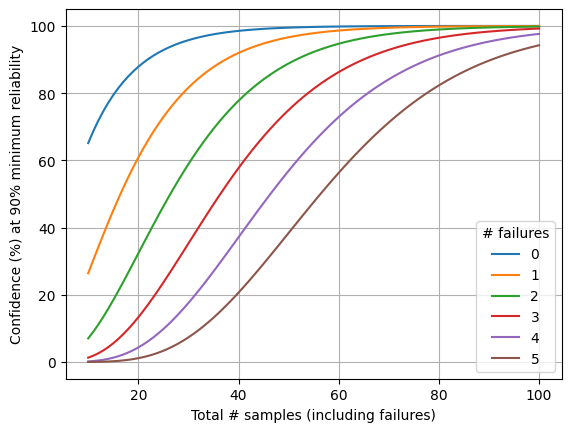

      10    20    30    40    50    60    70     80     90    100
--  ----  ----  ----  ----  ----  ----  ----  -----  -----  -----
 0  65.1  87.8  95.8  98.5  99.5  99.8  99.9  100.0  100.0  100.0
 1  26.4  60.8  81.6  92.0  96.6  98.6  99.5   99.8   99.9  100.0
 2   7.0  32.3  58.9  77.7  88.8  94.7  97.6   98.9   99.5   99.8
 3   1.3  13.3  35.3  57.7  75.0  86.3  92.9   96.5   98.3   99.2
 4   0.2   4.3  17.5  37.1  56.9  72.9  84.1   91.2   95.3   97.6
 5   0.0   1.1   7.3  20.6  38.4  56.3  71.3   82.3   89.7   94.2


In [28]:
#@title Confidence calculations { vertical-output: true }
n_start = 10 #@param {type:"integer"}
n_end = 100 #@param {type:"integer"}
n_step_plot = 1 #@param {type:"integer"}
n_step_table = 10 #@param {type:"integer"}
f_start = 0 #@param {type:"integer"}
f_end = 5 #@param {type:"integer"}
f_step = 1 #@param {type:"integer"}
reli_percent = 90 #@param {type:"integer"}

import matplotlib.pyplot as plt
from relistats.binomial import confidence

N = range(n_start, n_end+n_step_plot, n_step_plot) # number of samples
F = range(f_start, f_end+f_step, f_step) # number of failures
r = reli_percent/100 # reliability
for f in F:
  cc =  [100 *confidence(n, f, r) for n in N]
  plt.plot(N, cc)

plt.ylabel(f'Confidence (%) at {reli_percent}% minimum reliability')
plt.xlabel('Total # samples (including failures)')
#plt.title('Confidence Level for Number of Failures')
plt.legend(F, title="# failures")
plt.grid()
plt.show()

N = range(n_start, n_end+n_step_table, n_step_table) # number of samples
all_c = []
for f in F:
  cc =  [100 *confidence(n, f, r) for n in N]
  all_c.append(cc)

print(tabulate(all_c, headers=N, tablefmt=table_format, floatfmt=".1f", showindex="always"))

## Section 2.3: Assurance

There is a constant trade-off between reliability and confidence. Higher reliability means lower confidence and vice versa. The trade-off is optimal at the cross-over point between these two as shown in the code plot below. The shaded area shows the minimum of reliability and confidence. This minimum is highest at the cross-over point, known as assurance.

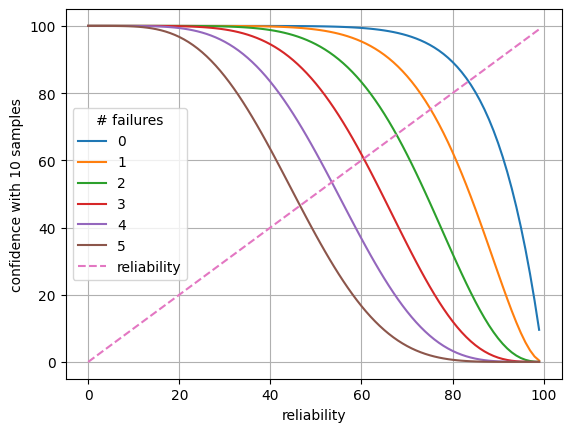

In [29]:
#@title Trade-off { vertical-output: true }
n = 10 #@param {type:"integer"}

f_start = 0 #@param {type:"integer"}
f_end = 5 #@param {type:"integer"}
f_step = 1 #@param {type:"integer"}
show_assurance = True #@param {type:"boolean"}

import matplotlib.pyplot as plt
from relistats.binomial import confidence

F = range(f_start, f_end+f_step, f_step) # number of failures
all_r = range(100)

for f in F:
    all_c = [confidence(n, f, r/100)*100 for r in all_r]
    plt.plot(all_r, all_c, label=f"{f}")

if show_assurance:
    plt.plot(all_r, all_r, '--', label='reliability')

plt.grid()
plt.legend(title="# failures")
plt.xlabel('reliability')
plt.ylabel(f'confidence with {n} samples')
plt.show()

## Assurance

Assurance simplifies reliability and confidence by setting both of them the same.
The result is just one number that is easier to communicate. For example, 90% assurance
means 90% reliability with 90% confidence. Given the number of samples and number of
failures, assurance is just one number.

As the number of samples increases, the assurance improves. You can see this behavior
in the plot and table below.

In the block below, the number of samples vary from 10 to 100 in steps of 10 and the
number of failures vary from 0 to 5. If you are using this notebook on Google Colab,
you can change these numbers on the right and see how the plot and table changes.

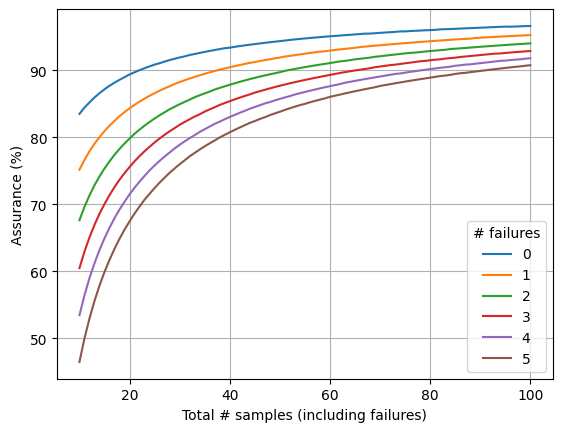

      10    20    30    40    50    60    70    80    90    100
--  ----  ----  ----  ----  ----  ----  ----  ----  ----  -----
 0  83.5  89.4  91.9  93.4  94.4  95.1  95.6  96.0  96.4   96.7
 1  75.2  84.3  88.3  90.5  91.9  93.0  93.8  94.4  94.9   95.3
 2  67.7  79.8  85.0  87.9  89.7  91.1  92.1  92.9  93.5   94.0
 3  60.5  75.6  81.9  85.4  87.7  89.3  90.6  91.5  92.3   92.9
 4  53.5  71.5  78.9  83.1  85.8  87.7  89.1  90.2  91.1   91.8
 5  46.5  67.5  76.0  80.8  83.8  86.1  87.7  88.9  89.9   90.8


In [30]:
#@title Assurance computations { vertical-output: true }
n_start = 10 #@param {type:"integer"}
n_end = 100 #@param {type:"integer"}
n_step_plot = 1 #@param {type:"integer"}
n_step_table = 10 #@param {type:"integer"}
f_start = 0 #@param {type:"integer"}
f_end = 5 #@param {type:"integer"}
f_step = 1 #@param {type:"integer"}

import matplotlib.pyplot as plt
from tabulate import tabulate
from relistats.binomial import assurance

N = range(n_start, n_end+n_step_plot, n_step_plot) # number of samples
F = range(f_start, f_end+f_step, f_step) # number of failures
for f in F:
  aa =  [100 *assurance(n, f) for n in N]
  plt.plot(N, aa)

plt.ylabel('Assurance (%)')
plt.xlabel('Total # samples (including failures)')
#plt.title('Confidence Level for Number of Failures')
plt.legend(F, title="# failures")
plt.grid()
plt.show()

N = range(n_start, n_end+n_step_table, n_step_table) # number of samples
all_a = []
for f in F:
  aa =  [100 *assurance(n, f) for n in N]
  all_a.append(aa)

print(tabulate(all_a, headers=N, tablefmt=table_format, floatfmt=".1f", showindex="always"))